In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Tuto of package grb_afterglow_sim

# Load the package

In [3]:
from pyGRBaglow.synchrotron_model import fireball_afterglow as grb

In [4]:
import pyGRBaglow.constants as cc

## GRB parameters for the fireball model

In [5]:
redshift = 3.92
n0 = 258.08
eps_b = 0.0272
eps_e = 0.547
E_iso = 4.41e53
eta=0.77
p=2.68  #>2
Y=0
ism_type=0

## Compute SED at given times

In [6]:
#GFT:4000-17000 angstroms
#Eclair:
#MXT:
#Radio: 
wavelength=np.logspace(-7,12,1e4) #in angstroms
time = [30/86400,10/1440,1/24,1] # in days

frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)


In [7]:
labels=['30s','10m','1h','1j']
colors=['blue','green','red','black']

<IPython.core.display.Javascript object>


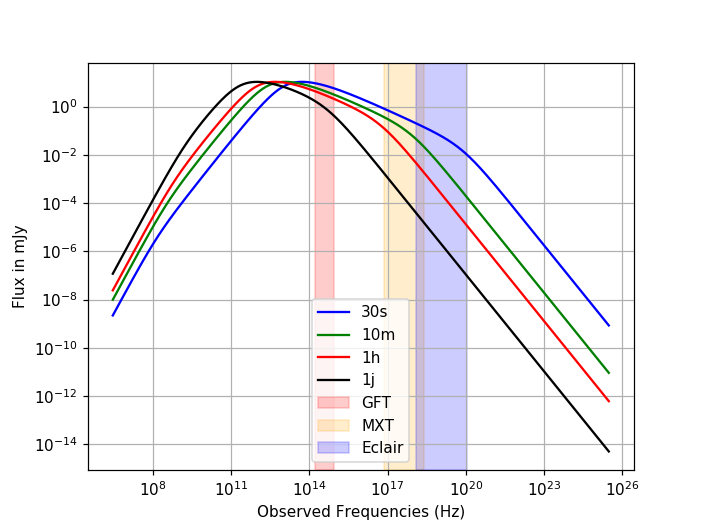

In [8]:
#Plot afterglow SED
plt.figure()
for i,t in enumerate(time):
    plt.plot(frequencies,afterglow_lc[i,:],label=labels[i],color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observed Frequencies (Hz)') 
plt.ylabel(r'Flux in mJy')
plt.grid(True)
plt.axvspan(cc.c_light_m_s*1e9/(350), cc.c_light_m_s*1e9/(1850),color='red', alpha=0.2,label="GFT")
plt.axvspan(0.3*1e3*cc.e_elec/(cc.H_planck), 10*1e3*cc.e_elec/(cc.H_planck), color='orange', alpha=0.2,label="MXT")
plt.axvspan(5e3*cc.e_elec/(cc.H_planck), 450e3*cc.e_elec/(cc.H_planck), color='blue', alpha=0.2,label="Eclair")

plt.legend(loc='best')


## Compute Light curve at given frequencies

In [16]:
#GFT:4000-17000 angstroms
#Eclair:
#MXT:
#Radio: 
wavelength=np.array([0.08,2.5,4500,16000]) #in angstroms
time = np.logspace(-5,7,1e4) # in days

frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)


In [17]:
labels=['Eclair','MXT','g band','H band']
colors=['blue','green','red','black']

<IPython.core.display.Javascript object>


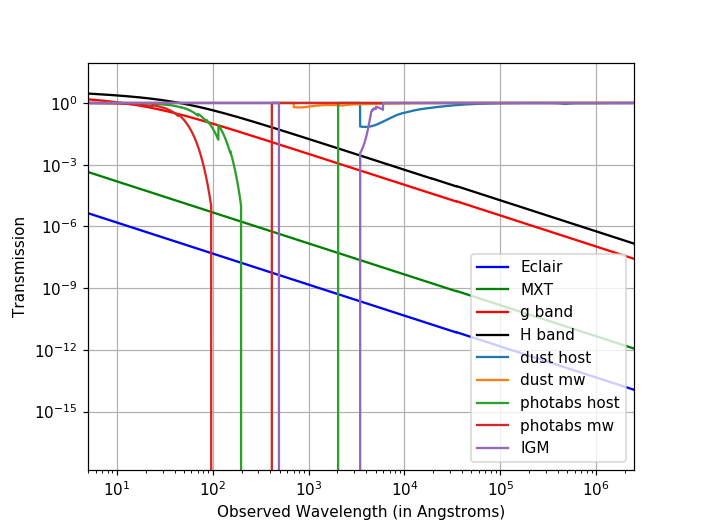

In [18]:
#Plot afterglow SED
plt.figure()
for i,wvl in enumerate(wavelength):
    plt.plot(time*24,afterglow_lc[:,i],label=labels[i],color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time since burst in hours') 
plt.ylabel(r'Flux in mJy')
plt.grid(True)
plt.legend(loc='best')

# Adding IGM, dust and photoelectric absorption

You need to have install the los_extinction package to continue

In [20]:
from pyGRBaglow.reddening import reddening
from pyGRBaglow.igm import meiksin

In [21]:
wavelength=np.logspace(-7,12,1e4) #in angstroms
#wavelength=np.linspace(400,20000,1e4) #in angstroms

time = [30/86400,10/1440,1/24,1] # in days

frequencies = 3e8 / (wavelength*1e-10)

#Load object
afterglow=grb(n0=n0,eps_b=eps_b,eps_e=eps_e,E_iso=E_iso,eta=eta,p=p,Y=Y,z=redshift,ism_type=ism_type,disp=0)
#Compute light curve for each time
afterglow_lc=afterglow.light_curve(time,frequencies)

In [22]:
#Compute dust extinction in Host galaxy and Milky Way
trans_dust_host=reddening(wavelength,redshift,Av=0.39).Pei92(law='smc',Xcut=True)[1]
trans_dust_mw=reddening(wavelength,0,Av=0.1).Pei92(law='mw',Xcut=True)[1]

In [23]:
#Compute gas extinction in Host galaxy and milky way
trans_photabs_host = reddening(wavelength,redshift,Av=0.2).gas_absorption(NHx=2)
trans_photabs_mw = reddening(wavelength,0,Av=0.2).gas_absorption()

In [24]:
#Compute IGM transmission
trans_IGM=meiksin(wavelength/10,redshift,Xcut=True)

In [25]:
trans_total=trans_dust_host*trans_dust_mw*trans_photabs_host*trans_photabs_mw*trans_IGM

In [26]:
plt.plot(wavelength,trans_dust_host,label='dust host')
plt.plot(wavelength,trans_dust_mw,label='dust mw')
plt.plot(wavelength,trans_photabs_host,label='photabs host')
plt.plot(wavelength,trans_photabs_mw,label='photabs mw')
plt.plot(wavelength,trans_IGM,label='IGM')
plt.ylabel('Transmission')
plt.xlabel('Observed Wavelength (in Angstroms)')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlim([5e0,5e5*(redshift+1)])

(5.0, 2460000.0)

In [27]:
labels=['30s','10m','1h','1j']
colors=['blue','green','red','black']

<IPython.core.display.Javascript object>


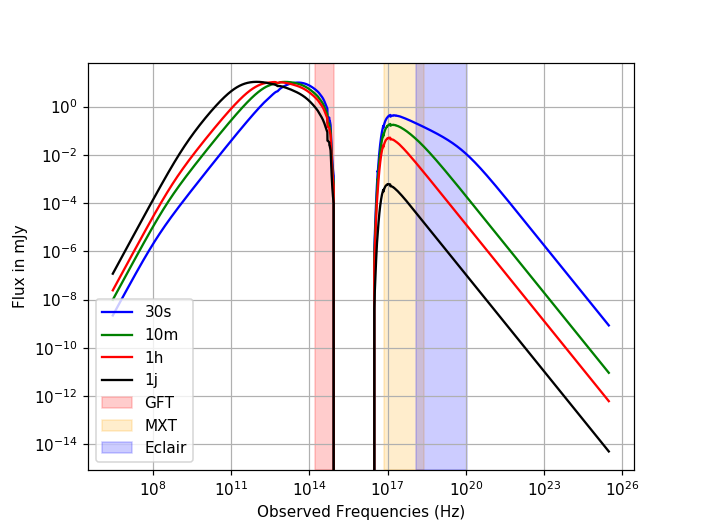

In [28]:
#Plot afterglow SED
plt.figure()
for i,t in enumerate(time):
    plt.plot(frequencies,afterglow_lc[i,:]*trans_total,label=labels[i],color=colors[i])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observed Frequencies (Hz)') 
plt.ylabel(r'Flux in mJy')
#plt.ylim([1e-7,1e2])
#plt.xlim([1e2,1e3])
plt.grid(True)
plt.axvspan(cc.c_light_m_s*1e9/(350), cc.c_light_m_s*1e9/(1850),color='red', alpha=0.2,label="GFT")
plt.axvspan(0.3*1e3*cc.e_elec/(cc.H_planck), 10*1e3*cc.e_elec/(cc.H_planck), color='orange', alpha=0.2,label="MXT")
plt.axvspan(5e3*cc.e_elec/(cc.H_planck), 450e3*cc.e_elec/(cc.H_planck), color='blue', alpha=0.2,label="Eclair")

plt.legend(loc='lower left')
